# Exploring the simulation results

In [21]:
import pandas as pd
import numpy as np
import statistics

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab

params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (8, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)

## Load and prepare the data

In [39]:
import os


base = "results/persistence_005_095_10"

filenames = [os.path.join(base, file) for file in sorted(os.listdir(base))]
filenames = ["results/basic_01_09_3/basic.hdf"]

dataframes = [(file.split(".")[0], pd.read_hdf(file)) for file in filenames]

# df = pd.read_hdf("results/test_empty.hdf")
_name, df = dataframes[0]
display(df.head())

def get_success_step(dists, success_dist):
    try:
        return np.where(dists < success_dist)[0][0]
    except IndexError:
        return np.NaN


SUCCESS_DIST = 10
ITERATIONS = df.iloc[0]["iterations"]
REPEATS = df.iloc[0]["repeats"]
N_SAMPLES = dataframes[0][1].shape[0]

for name, df in dataframes:
    df["success_steps"] = df.apply(
        lambda row: get_success_step(row["goal_distance"], SUCCESS_DIST), axis=1
    )
    print(name)

display(dataframes[0][1].sort_values("success_steps").head())

,perception,persistence,coordination,repeats,iterations,goal_distance,actions,parent_tps,infant_tps,infant_pos
0,0.1,0.1,0.1,4,20000,"[35.73099063870779, 35.73099063870779, 35.7364...","{'LookForToy': 4659, 'EvaluateToy': 14449, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5..."
1,0.1,0.1,0.5,4,20000,"[35.94925502977775, 35.94925502977775, 35.9492...","{'LookForToy': 5482, 'EvaluateToy': 15498, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5..."
2,0.1,0.1,0.9,4,20000,"[35.75644237405259, 35.75644237405259, 35.7564...","{'LookForToy': 9018, 'EvaluateToy': 20621, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5..."
3,0.1,0.5,0.1,4,20000,"[36.11938236453593, 36.11938236453593, 36.1193...","{'LookForToy': 2826, 'EvaluateToy': 8379, 'Cra...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5..."
4,0.1,0.5,0.5,4,20000,"[36.35882801120608, 36.35882801120607, 36.3588...","{'LookForToy': 4537, 'EvaluateToy': 11947, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5..."


results/basic_01_09_3/basic


,perception,persistence,coordination,repeats,iterations,goal_distance,actions,parent_tps,infant_tps,infant_pos,success_steps
8,0.1,0.9,0.9,4,20000,"[35.70545517182513, 35.70545517182513, 35.7054...","{'LookForToy': 8979, 'EvaluateToy': 19428, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",662.0
5,0.1,0.5,0.9,4,20000,"[36.568732054867894, 36.568732054867894, 36.59...","{'LookForToy': 8893, 'EvaluateToy': 19763, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",870.0
16,0.5,0.9,0.5,4,20000,"[35.792859399123486, 35.792859399123486, 35.79...","{'LookForToy': 4216, 'EvaluateToy': 10738, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",911.0
14,0.5,0.5,0.9,4,20000,"[36.270426348949684, 36.270426348949684, 36.27...","{'LookForToy': 8884, 'EvaluateToy': 19519, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",919.0
17,0.5,0.9,0.9,4,20000,"[36.174190270183026, 36.174190270183026, 36.18...","{'LookForToy': 8671, 'EvaluateToy': 18870, 'Cr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",924.0


In [8]:
# for name, df in dataframes:
#     df["perception"] = df["perception"].apply(lambda x: 1 - x)
#     df["persistence"] = df["persistence"].apply(lambda x: 1 - x)
#     df["coordination"] = df["coordination"].apply(lambda x: 1 - x)

#     df.to_hdf(f"results/persistence_005_095_10/{name}.hdf", key="hdfkey")

# name, df = dataframes[0]
# print(name)
# df

In [67]:
def plot_params_3d(ax, x, y, z, title=None, coord_lim=[0, 1], s=40, **kwargs):
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim(coord_lim)

    ax.set_xlabel("perception", fontweight="bold")
    ax.set_ylabel("persistence", fontweight="bold")
    ax.set_zlabel("coordination", fontweight="bold")

    plot = ax.scatter3D(x, y, z, cmap=plt.get_cmap("viridis_r"), s=s, **kwargs)
    plt.title(title)

    ax.set_box_aspect(None, zoom=0.85)
    # ax.tick_params(axis="x", pad=30)

    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.zaxis.labelpad = 15

    return plot

In [41]:
def create_heatmap(
    heatmap_data,
    param1,
    param2,
    labelsx=None,
    labelsy=None,
    figsize=(6, 6),
    invert_colors=False,
    title="",
    show_text=True,
):
    show_ticks = labelsx is not None or labelsy is not None

    if show_ticks:
        assert heatmap_data.shape == (len(labelsy), len(labelsx))

    colormap_data = np.nan_to_num(heatmap_data, nan=(np.nanmax(heatmap_data) + 100))

    fig, ax = plt.subplots(figsize=figsize)

    if invert_colors:
        cmap = matplotlib.colormaps["viridis_r"]
    else:
        cmap = matplotlib.colormaps["viridis"]
    im = ax.imshow(colormap_data, cmap=cmap)

    # Show all ticks and label them with the respective list entries

    if labelsx is not None and labelsy is not None:
        ax.set_xticks(np.arange(len(labelsx)), labels=labelsx)
        ax.set_yticks(np.arange(len(labelsy)), labels=labelsy)

    ax.set_xlabel(param1)
    ax.set_ylabel(param2)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    if show_text and show_ticks:
        for i in range(len(labelsx)):
            for j in range(len(labelsy)):
                text = ax.text(
                    i,
                    j,
                    heatmap_data[j, i],
                    ha="center",
                    va="center",
                    color="w",
                    fontsize=11,
                )

    if not show_ticks:
        plt.axis("off")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()


## Comparative results

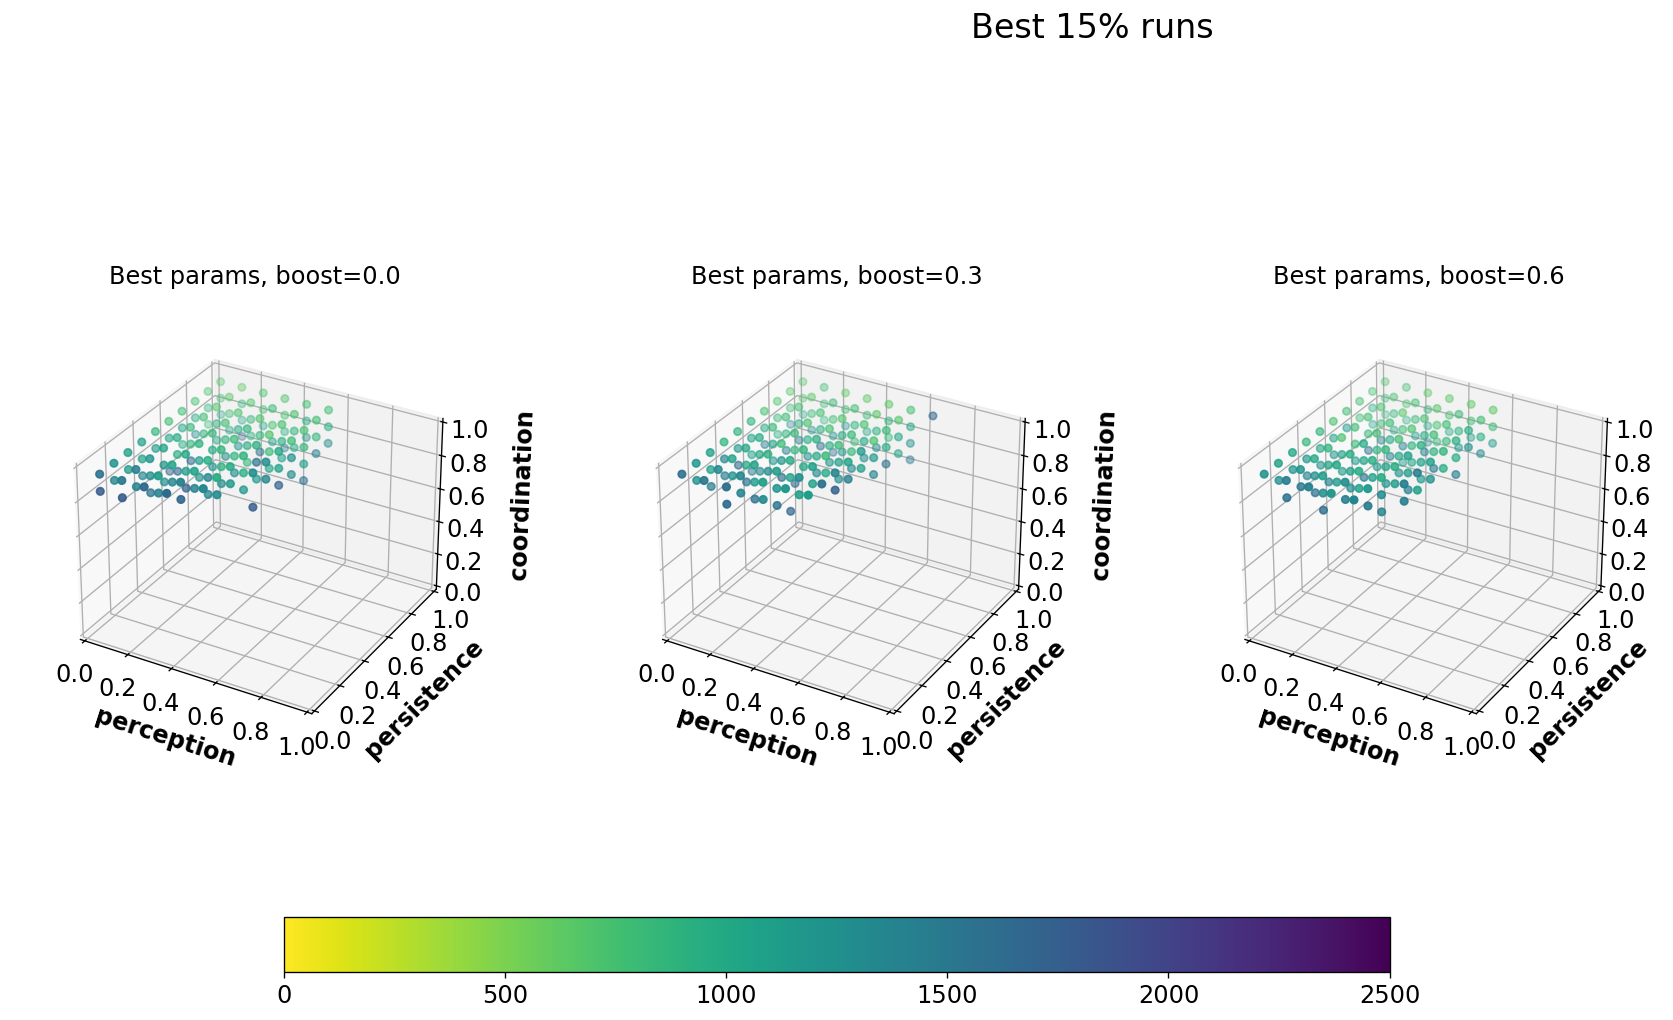

In [155]:
fig = plt.figure(figsize=(24, 10), dpi=120)

N_POINTS = 4
BEST_PERCENT = 15
BEST_N_POINTS = int(BEST_PERCENT / 100 * N_SAMPLES)

selected_df = [dataframes[i] for i in [0, 2, 4]]


for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[
            ["perception", "persistence", "coordination", "success_steps"]
        ]
        .to_numpy()
    )

    ax = fig.add_subplot(1, N_POINTS, i + 1, projection="3d")

    x, y, z, target = zip(*points)

    plot = plot_params_3d(
        ax,
        x,
        y,
        z,
        title=f"Best params, boost={boost_value}",
        c=target,
        s=20,
        vmin=0,
        vmax=1 / 8 * ITERATIONS,
    )

axes = fig.axes

fig.colorbar(plot, ax=axes, shrink=0.67, location="bottom")
fig.suptitle(f"Best {BEST_PERCENT}% runs", size="20")

plt.show()

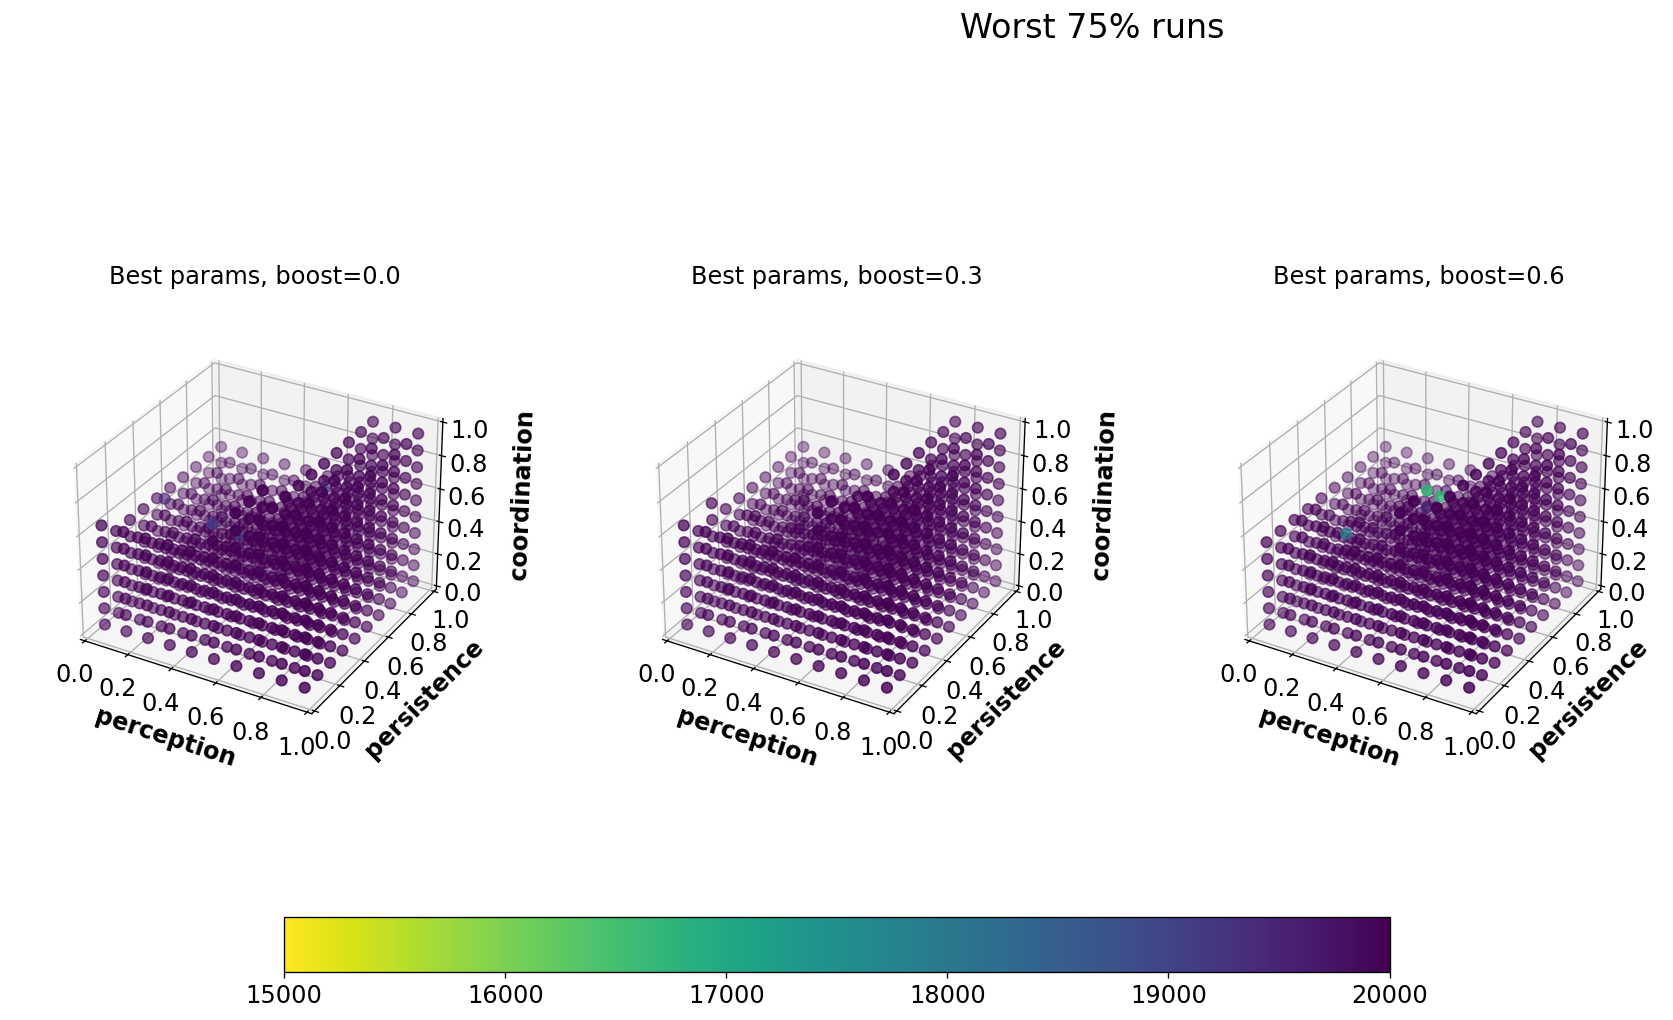

In [156]:
fig = plt.figure(figsize=(24, 10), dpi=120)

LAST_PERCENT = 75
LAST_N_POINTS = int(LAST_PERCENT / 100 * N_SAMPLES)

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    df["success_steps"] = df["success_steps"].fillna(ITERATIONS)

    points = (
        df.sort_values("success_steps")
        .tail(LAST_N_POINTS)[
            ["perception", "persistence", "coordination", "success_steps"]
        ]
        .to_numpy()
    )

    ax = fig.add_subplot(1, N_POINTS, i + 1, projection="3d")

    x, y, z, target = zip(*points)

    plot = plot_params_3d(
        ax,
        x,
        y,
        z,
        title=f"Best params, boost={boost_value}",
        c=target,
        vmin=3 / 4 * ITERATIONS,
        vmax=ITERATIONS,
    )

axes = fig.axes

cbar = fig.colorbar(plot, ax=axes, shrink=0.67, location="bottom")
fig.suptitle(f"Worst {LAST_PERCENT}% runs", size="20")
plt.show()

/var/folders/5f/kqrh3s354fl8g41k0s312pgh0000gn/T/ipykernel_14598/1418142149.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plot = ax.scatter3D(x, y, z, cmap=plt.get_cmap("viridis_r"), s=s, **kwargs)
/var/folders/5f/kqrh3s354fl8g41k0s312pgh0000gn/T/ipykernel_14598/1418142149.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plot = ax.scatter3D(x, y, z, cmap=plt.get_cmap("viridis_r"), s=s, **kwargs)


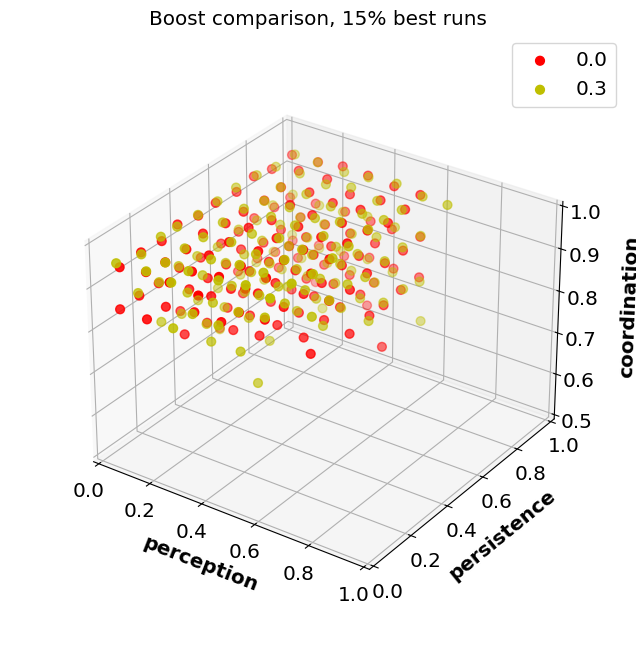

In [122]:
selected_df = [dataframes[i] for i in [0, 2]]
colors = ["r", "y", "b"]

JITTER = 0.008

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[["perception", "persistence", "coordination"]]
        .to_numpy()
    )

    x, y, z = zip(*points)

    x += np.random.uniform(-JITTER, JITTER, len(x))
    y += np.random.uniform(-JITTER, JITTER, len(y))
    z += np.random.uniform(-JITTER, JITTER, len(z))

    c = [colors[i] for _ in range(len(x))]

    plot = plot_params_3d(ax, x, y, z, coord_lim=[0.5, 1], color=c)
    plot.set_label(boost_value)

ax.set_title(f"Boost comparison, {BEST_PERCENT}% best runs")
ax.legend()
ax.view_init(30, -55)

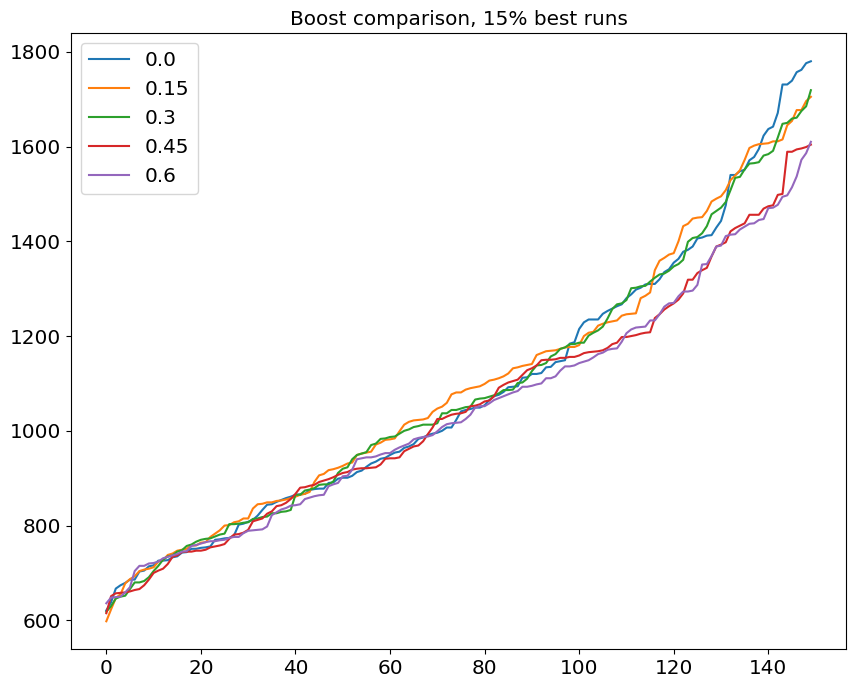

In [123]:
selected_df = [dataframes[i] for i in [0, 1, 2, 3, 4]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[["success_steps"]]
        .to_numpy()
    )

    plot = ax.plot(np.arange(len(points)), points, label=boost_value)

ax.set_title(f"Boost comparison, {BEST_PERCENT}% best runs")
ax.legend()

### See in how many cases, the increase in boost value resulted in better results

{0.0: [677.3, 706.25, 780.66, 905.18], 0.15: [693.6, 740.65, 847.84, 961.91], 0.3: [709.2, 728.95, 814.3, 959.67], 0.45: [697.1, 721.85, 804.82, 937.44], 0.6: [720.2, 743.3, 820.18, 936.87]}


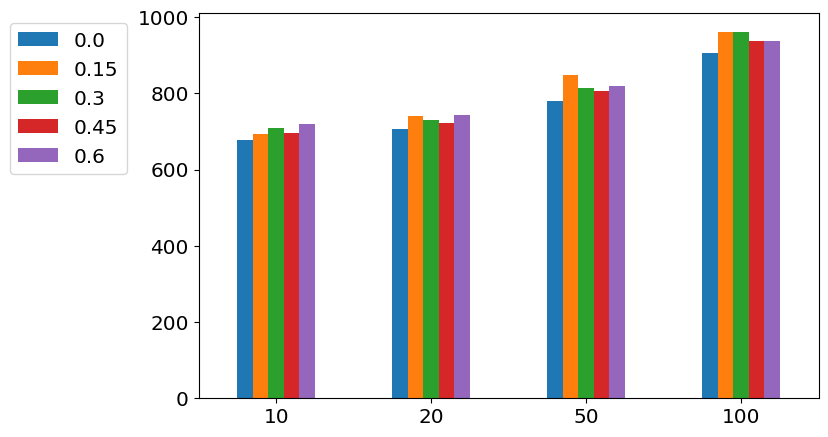

In [49]:
selected_df = [dataframes[i] for i in [1, 2, 3, 4]]
baseline_df = dataframes[0][1]

index = [10, 20, 50, 100]

plot_map = {0.0: []}

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)
    plot_map[boost_value] = []


for n_best_points in index:
    boost_cmp_df = baseline_df.sort_values("success_steps").head(n_best_points)[
        ["success_steps"]
    ]

    plot_map[0.0].append(np.average(boost_cmp_df["success_steps"]))

    for i, (name, df) in enumerate(selected_df):
        boost_value = np.round(int(name[-3:]) / 100, 2)

        boost_cmp_df[name] = df.iloc[baseline_df.index]["success_steps"]

        better_runs = len(
            boost_cmp_df[boost_cmp_df[name] > boost_cmp_df["success_steps"]]
        )
        plot_map[boost_value].append(np.average(boost_cmp_df[name]))

print(plot_map)
plot_df = pd.DataFrame(plot_map, index=index)
ax = plot_df.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(-0.1, 1))

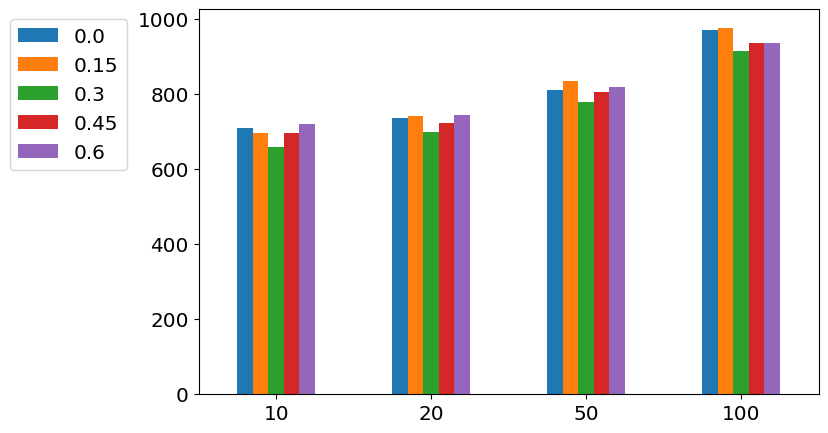

In [50]:
selected_df = [dataframes[i] for i in [0, 1, 2]]
baseline_df = dataframes[0][1]

index = [10, 20, 50, 100]

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)
    plot_map[boost_value] = []

for n_best_points in index:
    boost_cmp_df = df.sort_values("success_steps").head(n_best_points)[
        ["success_steps"]
    ]

    for i, (name, df) in enumerate(selected_df):
        boost_value = np.round(int(name[-3:]) / 100, 2)

        boost_cmp_df[name] = df.iloc[baseline_df.index]["success_steps"]

        better_runs = boost_cmp_df[
            boost_cmp_df[name] > boost_cmp_df["success_steps"]
        ].shape[0]
        plot_map[boost_value].append(np.average(boost_cmp_df[name]))


plot_df = pd.DataFrame(plot_map, index=index)
ax = plot_df.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(-0.1, 1))

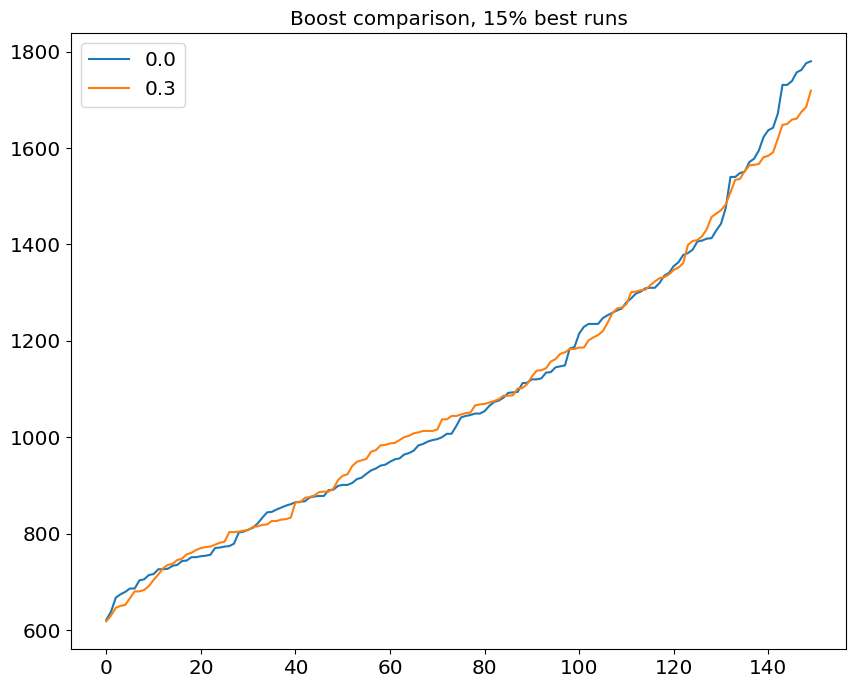

In [51]:
selected_df = [dataframes[i] for i in [0, 2]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

for i, (name, df) in enumerate(selected_df):
    boost_value = np.round(int(name[-3:]) / 100, 2)

    points = (
        df.sort_values("success_steps")
        .head(BEST_N_POINTS)[["success_steps"]]
        .to_numpy()
    )

    plot = ax.plot(np.arange(len(points)), points, label=boost_value)

ax.set_title(f"Boost comparison, {BEST_PERCENT}% best runs")
ax.legend()

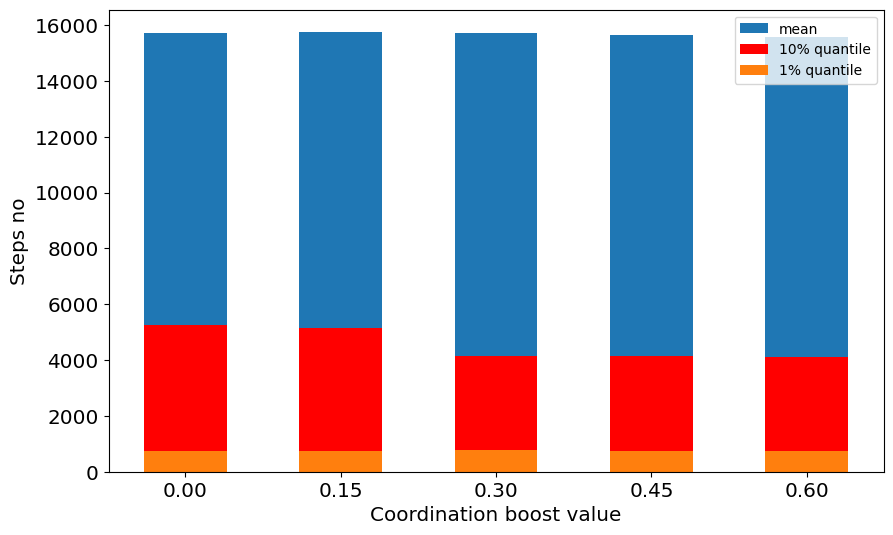

In [52]:
axis_x = []
y_mean = []
y_quantiles = np.zeros(shape=(len(dataframes), 99))

for i, (name, df) in enumerate(dataframes):
    axis_x.append(np.round(int(name[-3:]) / 100, 3))

    goal = df["success_steps"]
    goal = goal.fillna(ITERATIONS)

    y_mean.append(statistics.mean(goal))
    y_quantiles[i] = statistics.quantiles(goal, n=100)


f, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(axis_x, y_mean, width=0.08, label="mean")
ax1.set_xlabel("Coordination boost value")
ax1.set_ylabel("Steps no")

ax2 = plt.subplot()
ax2.bar(axis_x, y_quantiles[:, 20], width=0.08, label="10% quantile", color="r")
ax2.set_xticks(axis_x)

ax3 = plt.subplot()
ax3.bar(axis_x, y_quantiles[:, 1], width=0.08, label="1% quantile")
ax3.set_xticks(axis_x)
ax3.legend(prop={"size": 10})

results/basic_01_09_3/basic




,perception,persistence,coordination,repeats,iterations,actions,infant_pos,success_steps
8,0.1,0.9,0.9,4,20000,"{'LookForToy': 8753, 'EvaluateToy': 18151, 'Cr...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",739.0
17,0.5,0.9,0.9,4,20000,"{'LookForToy': 8632, 'EvaluateToy': 18120, 'Cr...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",748.0
5,0.1,0.5,0.9,4,20000,"{'LookForToy': 8824, 'EvaluateToy': 19036, 'Cr...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",936.0
14,0.5,0.5,0.9,4,20000,"{'LookForToy': 8991, 'EvaluateToy': 19044, 'Cr...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",997.0
2,0.1,0.1,0.9,4,20000,"{'LookForToy': 9190, 'EvaluateToy': 19738, 'Cr...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",1305.0
11,0.5,0.1,0.9,4,20000,"{'LookForToy': 8891, 'EvaluateToy': 19353, 'Cr...","([[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [5...",2125.0


success runs 6
Best: 739.0 Mean: 15809.25925925926


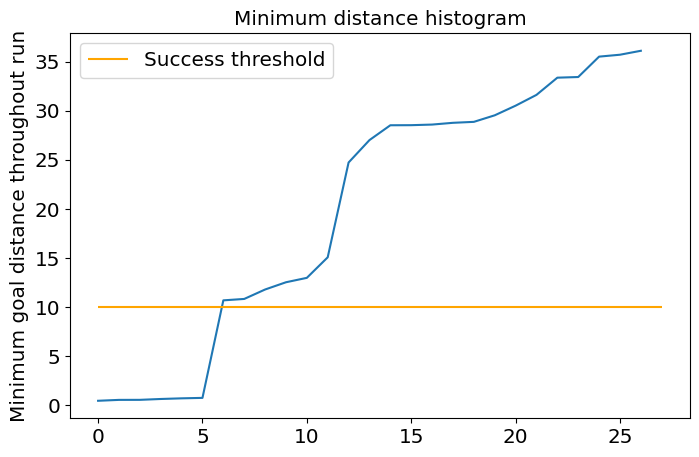

9


AssertionError: 

In [12]:
from statistics import mean

GRID_SIZE = 10


def draw_min_dist_histogram(df):
    y = (
        df.apply(lambda row: np.min(row["goal_distance"]), axis=1)
        .sort_values()
        .to_numpy()
    )

    fig, ax = plt.subplots()
    ax.plot(y)
    ax.set_title("Minimum distance histogram")
    ax.set_ylabel("Minimum goal distance throughout run")
    ax.hlines(
        y=SUCCESS_DIST, xmin=0, xmax=len(y), color="orange", label="Success threshold"
    )
    ax.legend()
    plt.show()

def get_heatmap_data(paramx, paramy, df):
    heatmap_data = np.zeros(shape=(GRID_SIZE, GRID_SIZE))
    # paramx = "perception"
    # paramy = "persistence"

    grouped = df_fill_na.groupby([paramy, paramx])
    # display(grouped.mean())

    # display(df_fill_na.sort_values(by=[paramx, paramy]))

    print(len(grouped))

    labelsx = []
    labelsy = []

    for idx, (name, group) in enumerate(grouped):
        # print(idx, idx // 5)

        value = group["success_steps"].mean()

        (p1, p2) = name

        if idx % GRID_SIZE == 0:
            labelsx.append(np.round(p1, 4))

        if idx // GRID_SIZE == 0:
            labelsy.append(np.round(p2, 4))

        heatmap_data[idx // GRID_SIZE, idx % GRID_SIZE] = value

    return labelsx, labelsy, heatmap_data


SUCCESS_DIST = 10

for name, df in dataframes:
    print(f"{name}\n\n")

    df["success_steps"] = df.apply(
        lambda row: get_success_step(row["goal_distance"], SUCCESS_DIST), axis=1
    )

    df_non_na = df[df["success_steps"].notnull()].sort_values(by=["success_steps"])
    display(
        df_non_na.head(10).drop(columns=["parent_tps", "infant_tps", "goal_distance"])
    )
    print(f"success runs {len(df_non_na)}")

    goal = df["success_steps"]
    goal = goal.fillna(ITERATIONS)
    best_result = sorted(goal)[0]

    print(f"Best: {best_result} Mean: {mean(goal)}")

    draw_min_dist_histogram(df)

    df_fill_na = df
    df_fill_na[["success_steps"]] = df[["success_steps"]].fillna(ITERATIONS)
    # display(df_fill_na)
    # grouped = df_fill_na.groupby(["perception", "persistence"])

    for paramx, paramy in [
        ("perception", "persistence"),
        ("perception", "coordination"),
        ("persistence", "coordination"),
    ]:
        labelsx, labelsy, heatmap_data = get_heatmap_data(paramx, paramy, df_fill_na)

        create_heatmap(
            heatmap_data,
            paramx,
            paramy,
            labelsx,
            labelsy,
            invert_colors=True,
            figsize=(8, 8),
        )

In [145]:
ordered_runs = dataframes[0][1].sort_values("success_steps")
display(ordered_runs.head(5))
display(ordered_runs.tail(5))

,perception,persistence,coordination,repeats,iterations,goal_distance,actions,parent_tps,infant_tps,infant_pos,success_steps
74,0.5,0.9,0.9,11,20000,"[36.08214787635561, 36.08214787635561, 36.0821...","{'LookForToy': 24037, 'EvaluateToy': 50288, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",708.0
24,0.1,0.9,0.9,11,20000,"[36.27378963026314, 36.27378963026314, 36.2737...","{'LookForToy': 24325, 'EvaluateToy': 50583, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",753.0
49,0.3,0.9,0.9,11,20000,"[36.19531731081324, 36.19531731081324, 36.2044...","{'LookForToy': 24131, 'EvaluateToy': 51153, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",790.0
19,0.1,0.7,0.9,11,20000,"[36.03264387116124, 36.03264387116124, 36.0326...","{'LookForToy': 24182, 'EvaluateToy': 51057, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",804.0
69,0.5,0.7,0.9,11,20000,"[36.101701875356575, 36.101701875356575, 36.10...","{'LookForToy': 24486, 'EvaluateToy': 51523, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",824.0


,perception,persistence,coordination,repeats,iterations,goal_distance,actions,parent_tps,infant_tps,infant_pos,success_steps
120,0.9,0.9,0.1,11,20000,"[35.89752153317939, 35.89752153317939, 35.8975...","{'LookForToy': 24295, 'EvaluateToy': 70531, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",NaN
121,0.9,0.9,0.3,11,20000,"[36.32789634507768, 36.32789634507768, 36.3278...","{'LookForToy': 18052, 'EvaluateToy': 45161, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",NaN
122,0.9,0.9,0.5,11,20000,"[35.89964680448042, 35.89964680448042, 35.8996...","{'LookForToy': 15718, 'EvaluateToy': 33877, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",NaN
123,0.9,0.9,0.7,11,20000,"[36.072388248811876, 36.072388248811876, 36.07...","{'LookForToy': 19591, 'EvaluateToy': 38965, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [49...",NaN
124,0.9,0.9,0.9,11,20000,"[36.09552810471375, 36.09552810471375, 36.1029...","{'LookForToy': 28964, 'EvaluateToy': 47990, 'C...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[50.0, 50.0], [50.0, 50.0], [50.0, 50.0], [50...",NaN


## Evaluate position trails

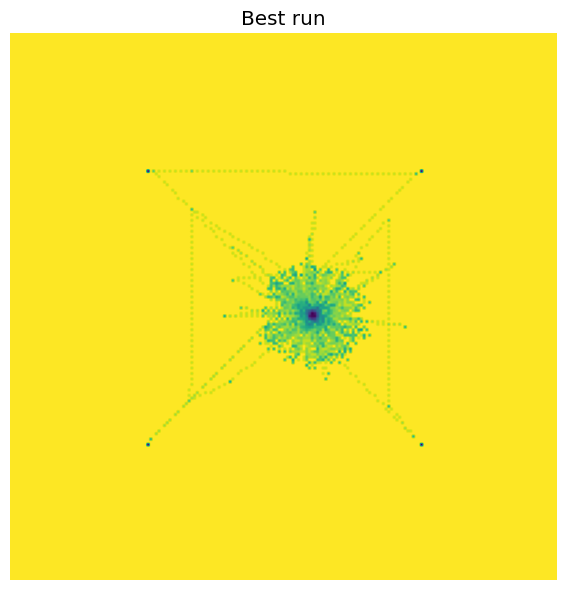

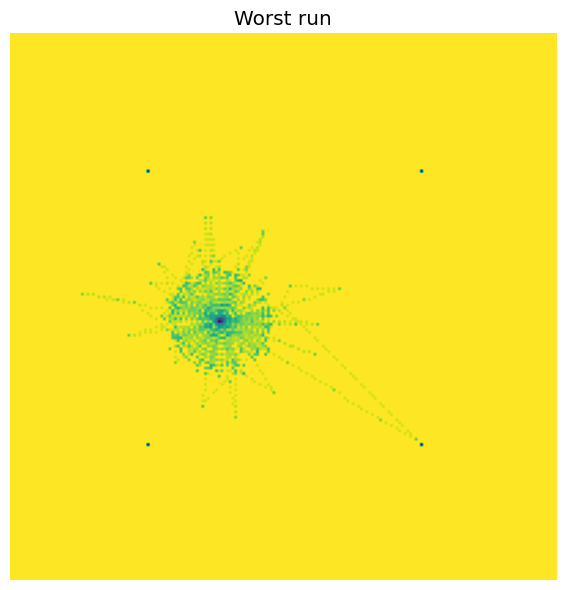

In [42]:
def create_run_position_heatmap(run, grid_size, title=""):
    positions = run["infant_pos"][1]
    pos_x = positions[:, 0]
    pos_y = positions[:, 1]

    heatmap_data = np.zeros(shape=(grid_size, grid_size))

    bins = np.linspace(0, 100, grid_size + 1)[1:-1]
    indices_x = np.digitize(pos_x, bins)
    indices_y = np.digitize(pos_y, bins)

    indices = zip(indices_x, indices_y)

    for idx in indices:
        heatmap_data[idx] += 1

    toy_value = np.max(heatmap_data)

    for t_x in [25, 75]:
        for t_y in [25, 75]:
            idx_x = np.digitize([t_x], bins)
            idx_y = np.digitize([t_y], bins)

            heatmap_data[idx_x, idx_y] += toy_value

    heatmap_data = np.log1p(heatmap_data)

    create_heatmap(
        heatmap_data,
        param1="x",
        param2="y",
        invert_colors=True,
        show_text=False,
        title=title,
        figsize=(6, 6),
    )


ordered_runs = dataframes[0][1].sort_values("success_steps")

create_run_position_heatmap(ordered_runs.iloc[0], 200, title="Best run")
create_run_position_heatmap(ordered_runs.iloc[-1], 200, title="Worst run")

In [116]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n


def visualize_run(run, average_steps=500, extra_title=""):
    x = list(range(run["iterations"]))

    step_stats = run["goal_distance"]
    parent_stats = run["parent_tps"]
    infant_stats = run["infant_tps"]

    parent_stats = moving_average(parent_stats, average_steps)
    infant_stats = moving_average(infant_stats, average_steps)

    fig, ax1 = plt.subplots()

    ax1.plot(x, step_stats, color="r")
    ax1.set_ylim(bottom=0, top=50)
    ax1.set_ylabel("toy distance")
    ax1.set_xlabel("step")

    title = f'perc={run["perception"]:.2f}, pers={run["persistence"]:.2f}, \
coord={run["coordination"]:.2f},\n\
avg for {run["repeats"]} runs'

    if extra_title != "":
        title = extra_title + "\n" + title

    ax1.set_title(title)
    ax1.legend(["toy distance"], loc="lower right")

    ax2 = ax1.twinx()
    ax2.plot(x, parent_stats, color="b")
    ax2.set_ylabel("TPS")

    ax2.plot(x, infant_stats, color="orange")
    ax2.set_ylim(bottom=0)

    ax2.axvline(x=average_steps - 1, color="grey", label="axvline - full height")
    ax2.legend(["parent TPS", "infant TPS"], loc="upper right")

    x_ticks = np.append(ax1.get_xticks()[1:-1], average_steps)
    ax1.set_xticks(x_ticks)
    ax2.set_xticks(x_ticks)

    fig.tight_layout()
    # plt.savefig(f'../../plots/big_{current_param}.png', dpi=300)
    plt.show()

### Show a couple of randomly selected runs and see how they performed

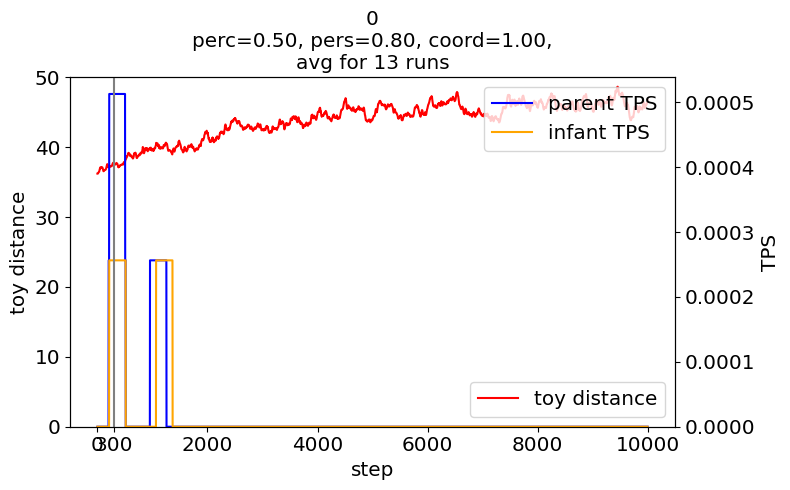

In [6]:
average_steps = 300

random_runs = np.random.choice(range(len(df)), size=1, replace=False)
for r in random_runs:
    visualize_run(df.iloc[r, :], extra_title=str(r), average_steps=average_steps)

## 1. Using steps required to reach emergent action as a metric

### Add new column, which determines if the run was successful and if so - in how many steps the goal has been achieved

In [10]:
df["success_steps"] = df.apply(
    lambda row: get_success_step(row["goal_distance"], SUCCESS_DIST), axis=1
)
df.sort_values(by=["success_steps"]).head(16)

,perception,persistence,coordination,repeats,iterations,goal_distance,parent_tps,infant_tps,success_steps
15,0.900000,0.000000,0.100000,11,15000,"[36.160820030176815, 36.160820030176815, 36.15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",695.0
27,0.633333,0.366667,0.100000,11,15000,"[36.058102049644326, 36.058102049644326, 36.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",822.0
31,0.633333,0.000000,0.100000,11,15000,"[36.10495501916605, 36.10495501916604, 36.1288...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",822.0
11,0.900000,0.366667,0.100000,11,15000,"[35.98382655350573, 35.98382655350573, 35.9850...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",895.0
23,0.633333,0.433333,0.100000,11,15000,"[35.85149045507967, 35.85149045507967, 35.8501...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",895.0
7,0.900000,0.433333,0.000000,11,15000,"[36.22922171061668, 36.22922171061668, 36.2172...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",936.0
30,0.633333,0.100000,0.366667,11,15000,"[35.79082090815256, 35.79082090815256, 35.8000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1312.0
47,0.366667,0.100000,0.100000,11,15000,"[36.09651950793614, 36.09651950793614, 36.0899...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1433.0
19,0.633333,0.700000,0.100000,11,15000,"[36.14991388106114, 36.14991388106114, 36.1592...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1595.0
3,0.900000,0.700000,0.100000,11,15000,"[36.206589466738414, 36.206589466738414, 36.21...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1981.0


In [8]:
df.loc[:, "success_steps"].mean()

nan

### Show the histogram of minimum distance in each run, and histogram of the number of steps required to reach the goal

In [81]:
df.loc[:, "success_steps"].count()

874

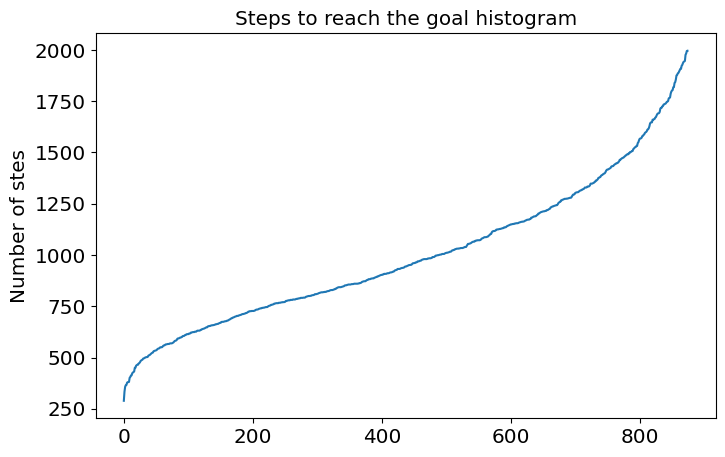

In [75]:
y = (
    df[df["success_steps"].notna()]
    .apply(lambda row: np.min(row["success_steps"]), axis=1)
    .sort_values()
    .to_numpy()
)

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title("Steps to reach the goal histogram")
ax.set_ylabel("Number of stes")
plt.show()

### See how the best run performed, for different number of steps used in calculating the moving average
(the grey vertical line shows the number of steps used for calculating the average)

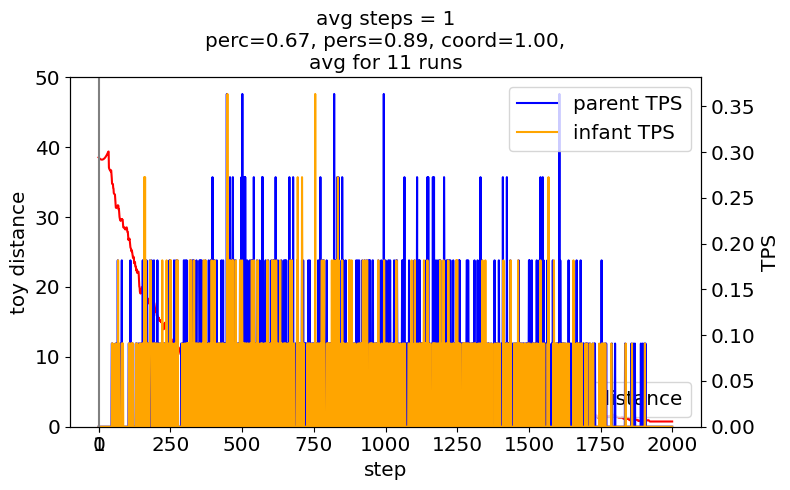

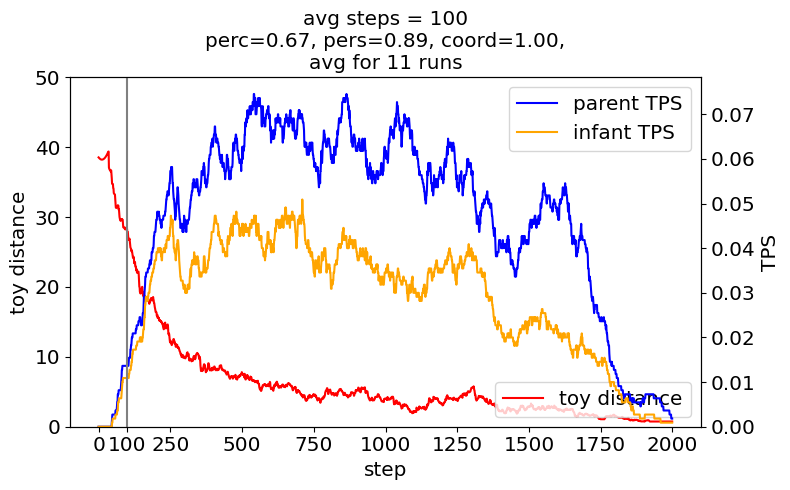

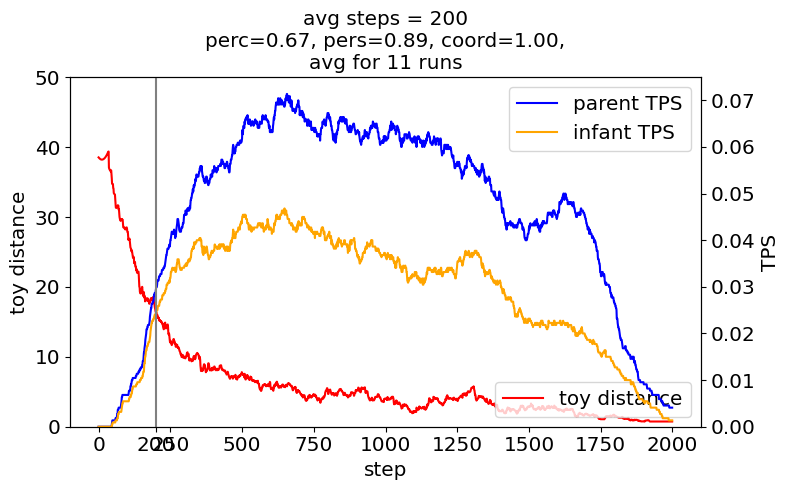

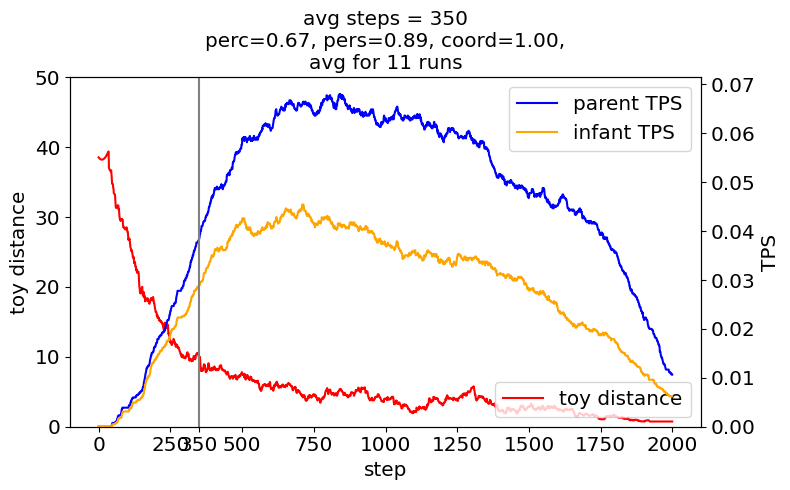

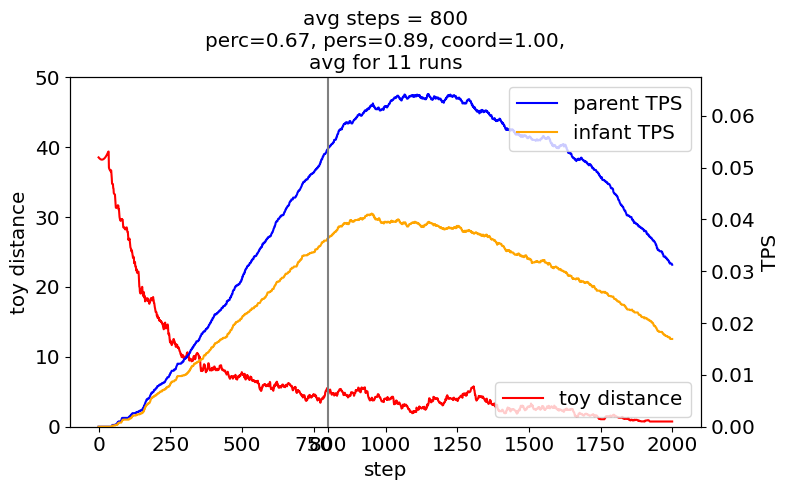

In [83]:
for steps in [1, 100, 200, 350, 800]:
    visualize_run(
        df.sort_values(by=["success_steps"]).iloc[0, :],
        average_steps=steps,
        extra_title=f"avg steps = {steps}",
    )

### Create heatmap for 2 variables
We define two ways of creating the heatmap:
1. Find 3 paramters which change the least in the top N runs and free the remaining two
2. Find the top 2 parameters that changed the least in the top N runs. Then group all data by those two parameters, averaging the remaining values - most importantly - the selected metric values

In [52]:
def get_heatmap_data_fixed(df, metric, top_runs_no, ascending=True):
    top_runs = df.sort_values(by=[metric], ascending=ascending).head(top_runs_no)

    params_data = []

    for param in ["perception", "persistence", "coordination"]:
        bincount = np.bincount(top_runs[param])
        count = np.max(bincount)
        value = np.argmax(bincount)

        params_data.append([param, value, count])

    params_df = pd.DataFrame(
        params_data, columns=["param", "best_value", "count"]
    ).sort_values("count", ascending=False)
    print(params_df)
    fixed_params = (
        params_df.head(1).loc[:, ["param", "best_value"]].to_numpy().reshape(2)
    )
    free_params = (
        params_df.tail(2).loc[:, ["param", "best_value"]].to_numpy().reshape(4)
    )

    p1, v1 = fixed_params
    param1, val1, param2, val2 = free_params

    selected_runs = df[(df[p1] == v1)]
    selected_runs = selected_runs.sort_values(by=[param1, param2])

    labels1 = selected_runs[param1].unique().round(3)
    labels2 = selected_runs[param2].unique().round(3)

    hm_data = selected_runs[metric].to_numpy().reshape(len(labels1), len(labels2)).T

    return hm_data, fixed_params, [param1, param2], [labels1, labels2]

In [48]:
def create_heatmap(heatmap_data, labelsx, labelsy, invert_colors=False, title=""):
    assert heatmap_data.shape == (len(labelsy), len(labelsx))

    colormap_data = np.nan_to_num(heatmap_data, nan=(np.nanmax(heatmap_data) + 100))

    fig, ax = plt.subplots(figsize=(8, 8))

    if invert_colors:
        cmap = matplotlib.colormaps["viridis_r"]
    else:
        cmap = matplotlib.colormaps["viridis"]
    im = ax.imshow(colormap_data, cmap=cmap)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labelsx)), labels=labelsx)
    ax.set_yticks(np.arange(len(labelsy)), labels=labelsy)

    ax.set_xlabel(param1)
    ax.set_ylabel(param2)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labelsx)):
        for j in range(len(labelsy)):
            text = ax.text(
                i,
                j,
                heatmap_data[j, i],
                ha="center",
                va="center",
                color="w",
                fontsize=14,
            )

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

### Show the heatmap for the fixed 3 parameters, which were the most common in the top 30 runs

          param  best_value  count
2  coordination           0     30
0    perception           0     25
1   persistence           0     21


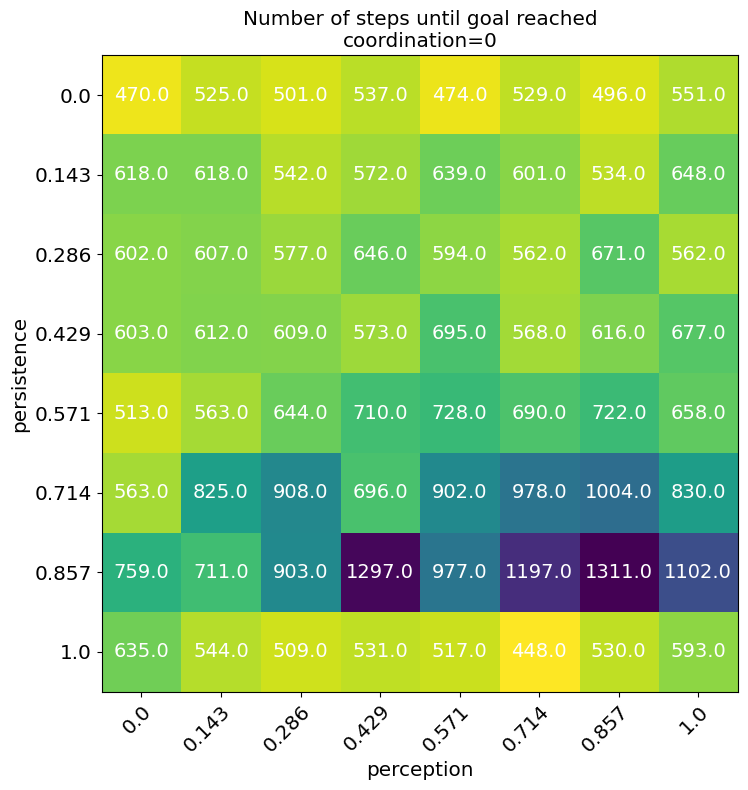

In [53]:
(
    hm_data,
    [p1, v1],
    [param1, param2],
    [labels1, labels2],
) = get_heatmap_data_fixed(df, "success_steps", top_runs_no=30)
title = f"Number of steps until goal reached\n{p1}={v1}"
create_heatmap(hm_data, labels1, labels2, invert_colors=True, title=title)

## Using TPS (third-party state) measure as a metric

Let's define two metrics - maximum TPS throughout the run, and TPS at the end of the run. 
Both values will be calculated using the moving average.
We will measure the TPS for parent and infant separately.

In [23]:
average_steps = 500

In [15]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n

In [24]:
df_tps = df.copy()

df_tps["parent_tps_max"] = df.apply(
    lambda row: moving_average(row["parent_satisfaction"], n=average_steps).max(),
    axis=1,
)
df_tps["parent_tps_end"] = df.apply(
    lambda row: moving_average(row["parent_satisfaction"], n=average_steps)[-1], axis=1
)
df_tps["infant_tps_max"] = df.apply(
    lambda row: moving_average(row["infant_satisfaction"], n=average_steps).max(),
    axis=1,
)
df_tps["infant_tps_end"] = df.apply(
    lambda row: moving_average(row["infant_satisfaction"], n=average_steps)[-1], axis=1
)

In [25]:
new_df = df_tps.groupby(["coordination", "precision"]).mean(numeric_only=True)
new_df

width  height  speed  lego_count  exploration  \
coordination precision                                                  
0.0          20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
25.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
50.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
75.0         20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   
100.0        20.0       300.0   300.0    2.0         4.0         50.0   
             40.0       300.0   300.0    2.0         4.0         50.0   
             60.0       300.0   300.0    2.0         4.0         50.0   
             80.0       300.0   300.0    2.0         4.0         50.0   
             100.0      300.0   300.0    2.0         4.0         50.0   

                        responsiveness  relevance  repeats  max_iter  \
coordination precision                                                 
0.0          20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
25.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
50.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
75.0         20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   
100.0        20.0                 50.0       50.0    100.0    5000.0   
             40.0                 50.0       50.0    100.0    5000.0   
             60.0                 50.0       50.0    100.0    5000.0   
             80.0                 50.0       50.0    100.0    5000.0   
             100.0                50.0       50.0    100.0    5000.0   

                        success_steps  parent_tps_max  parent_tps_end  \
coordination precision            

### Repeat all of the above, using the four newly created metrics
For each metric (`tps_max` / `tps_end`), (`parent` / `infant`) plot the run with the best result and the two types of heatmap

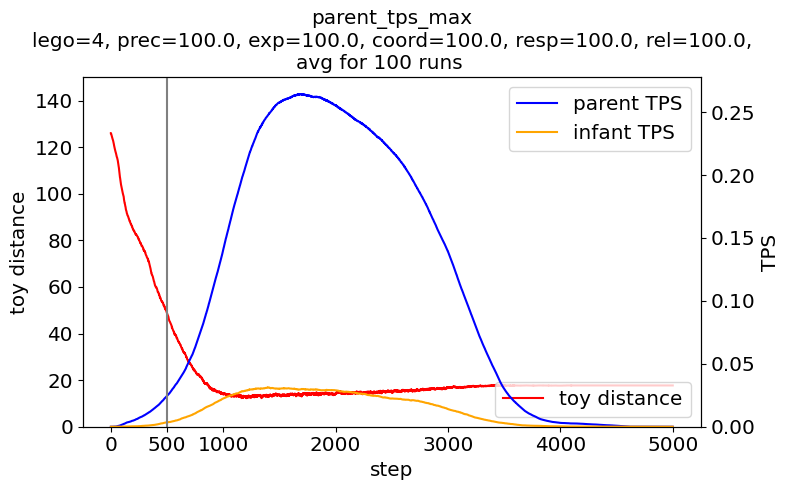

            param  best_value  count
2       relevance         100     30
3  responsiveness         100     30
0       precision         100     15
4    coordination         100     13
1     exploration          75     11


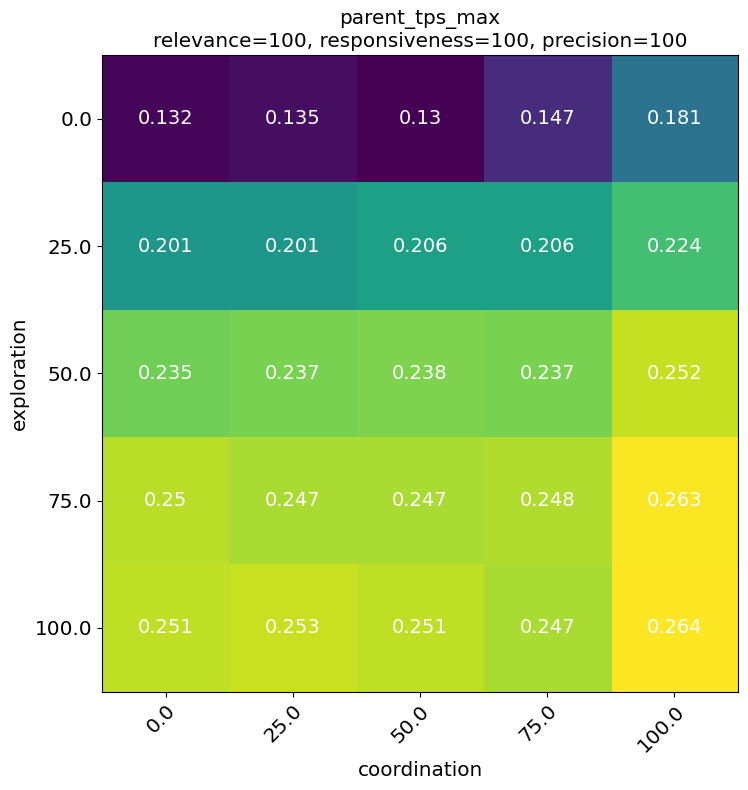

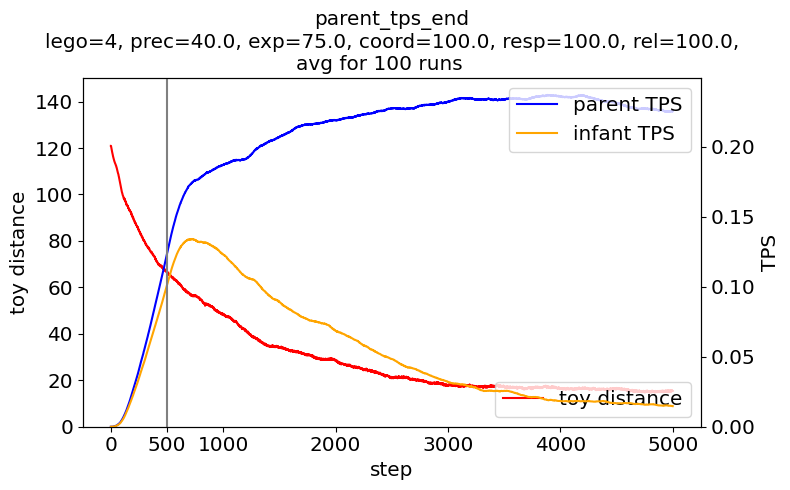

            param  best_value  count
2       relevance         100     30
3  responsiveness         100     19
4    coordination         100     18
0       precision          20     15
1     exploration          50      9


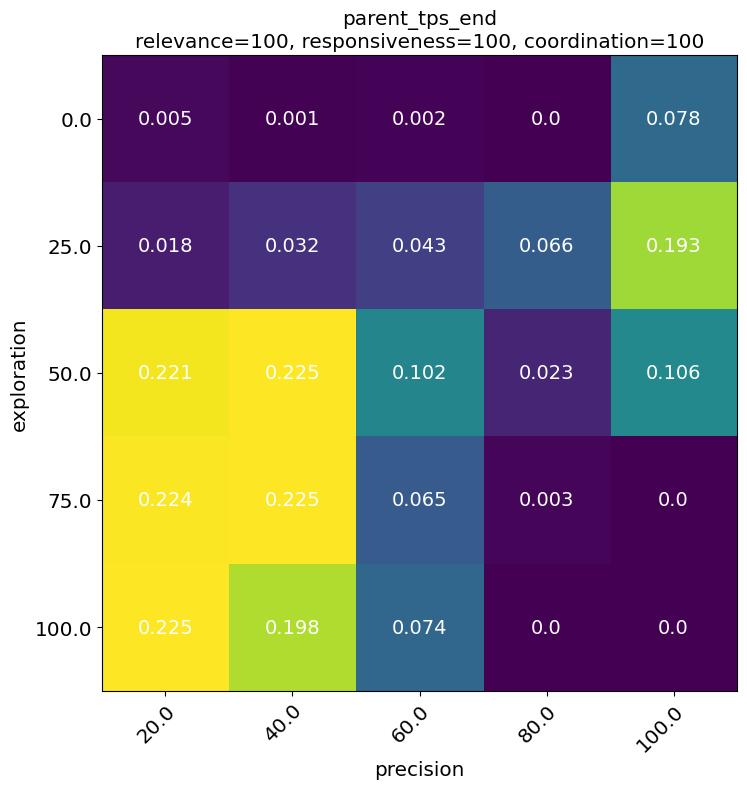

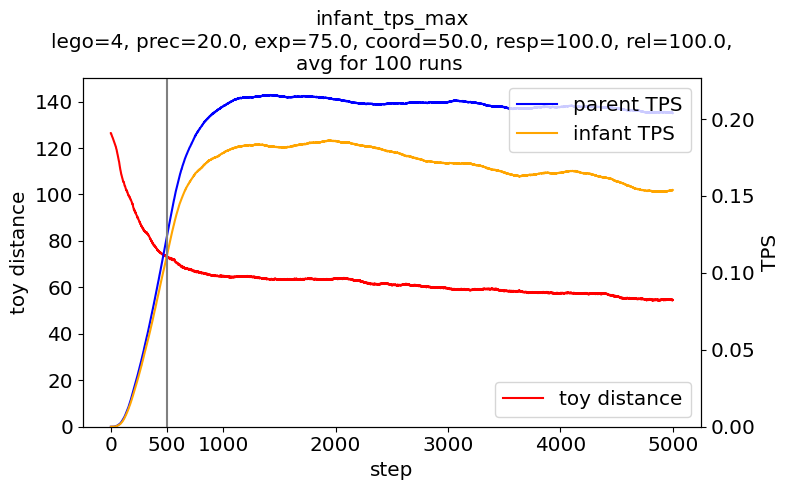

            param  best_value  count
3  responsiveness         100     30
0       precision          20     24
4    coordination         100     18
2       relevance         100     16
1     exploration          50      8


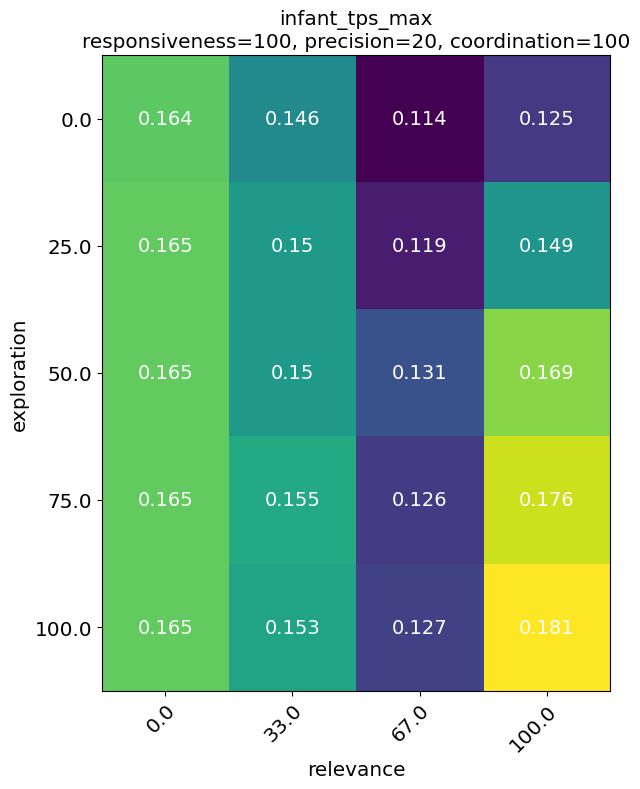

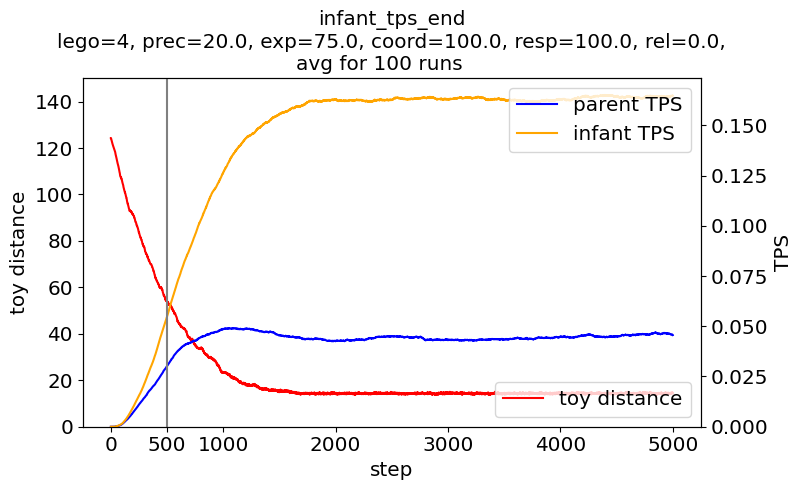

            param  best_value  count
3  responsiveness         100     30
4    coordination         100     24
0       precision          20     16
2       relevance           0     15
1     exploration          75      9


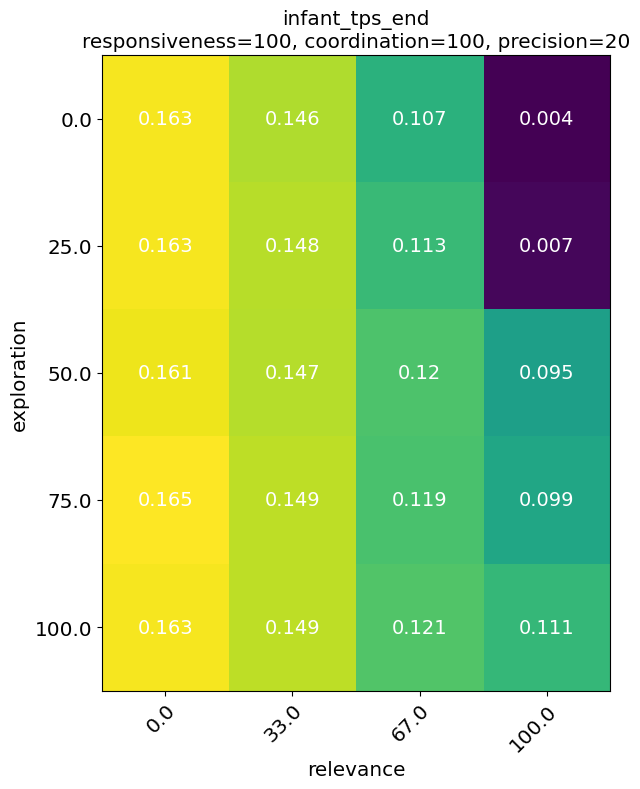

In [30]:
for agent in ["parent", "infant"]:
    for kind in ["max", "end"]:
        metric = agent + "_tps_" + kind
        visualize_run(
            df_tps.sort_values(by=[metric], ascending=False).iloc[0, :],
            average_steps=average_steps,
            extra_title=metric,
        )

        (
            hm_data,
            [p1, v1, p2, v2, p3, v3],
            [param1, param2],
            [labels1, labels2],
        ) = get_heatmap_data_fixed(df_tps, metric, top_runs_no=30, ascending=False)
        title = f"{metric}\n{p1}={v1}, {p2}={v2}, {p3}={v3}"
        create_heatmap(hm_data.round(3), labels1, labels2, title=title)